# Sentiment Analysis of Social Media Data using Deep Learning and Big Data Processing

## Importing Libraries

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [102]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout
from keras.preprocessing.sequence import pad_sequences
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [3]:
df = pd.read_csv(r"C:\Users\Ycomputer\Downloads\Semester 02 - CA01 MSc Data Analytics\sentimentdataset.csv")

## Performing Exploratory Data Analysis - EDA

#### View and Basic Information Regarding Dataset

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,1/15/2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,1/15/2023 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,1/15/2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,1/15/2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,1/15/2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [5]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
727,728,732,Collaborating on a science project that receiv...,Happy,8/18/2017 18:20,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,6/22/2018 14:15,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,4/5/2019 17:30,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2/29/2020 20:45,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK,2020,2,29,20
731,732,736,Organizing a virtual talent show during challe...,Happy,11/15/2020 15:15,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24,47,USA,2020,11,15,15


In [6]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [7]:
df.count()

Unnamed: 0.1    732
Unnamed: 0      732
Text            732
Sentiment       732
Timestamp       732
User            732
Platform        732
Hashtags        732
Retweets        732
Likes           732
Country         732
Year            732
Month           732
Day             732
Hour            732
dtype: int64

In [8]:
df.shape

(732, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  732 non-null    int64 
 1   Unnamed: 0    732 non-null    int64 
 2   Text          732 non-null    object
 3   Sentiment     732 non-null    object
 4   Timestamp     732 non-null    object
 5   User          732 non-null    object
 6   Platform      732 non-null    object
 7   Hashtags      732 non-null    object
 8   Retweets      732 non-null    int64 
 9   Likes         732 non-null    int64 
 10  Country       732 non-null    object
 11  Year          732 non-null    int64 
 12  Month         732 non-null    int64 
 13  Day           732 non-null    int64 
 14  Hour          732 non-null    int64 
dtypes: int64(8), object(7)
memory usage: 85.9+ KB


In [10]:
df.duplicated().sum()

0

<Axes: ylabel='count'>

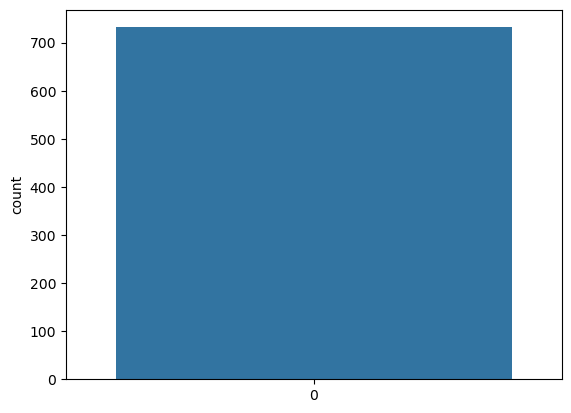

In [11]:
sns.countplot(df['Day'])

In [12]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [13]:
df.dtypes

Unnamed: 0.1     int64
Unnamed: 0       int64
Text            object
Sentiment       object
Timestamp       object
User            object
Platform        object
Hashtags        object
Retweets         int64
Likes            int64
Country         object
Year             int64
Month            int64
Day              int64
Hour             int64
dtype: object

<Axes: >

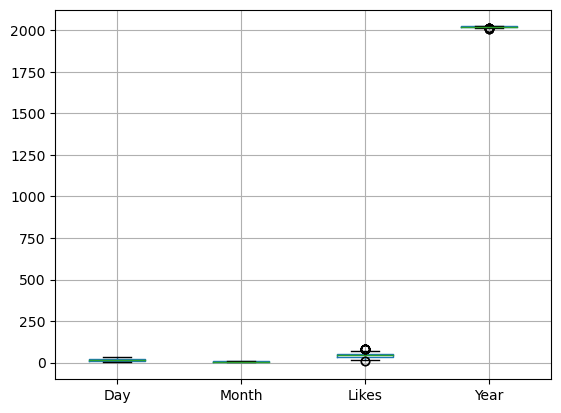

In [14]:
df[['Day','Month','Likes','Year']].boxplot()

In [15]:
df.corr()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
Unnamed: 0.1,1.000000,0.999995,0.388637,0.376208,0.101578,0.443013,-0.080101,0.322371
Unnamed: 0,0.999995,1.000000,0.388884,0.376472,0.100749,0.443523,-0.080480,0.322163
Retweets,0.388637,0.388884,1.000000,0.998482,-0.039982,0.073265,0.009213,0.196955
Likes,0.376208,0.376472,0.998482,1.000000,-0.043415,0.066643,0.011489,0.195331
Year,0.101578,0.100749,-0.039982,-0.043415,1.000000,-0.314845,0.021973,-0.087470
Month,0.443013,0.443523,0.073265,0.066643,-0.314845,1.000000,-0.135873,0.137835
Day,-0.080101,-0.080480,0.009213,0.011489,0.021973,-0.135873,1.000000,0.044072
Hour,0.322371,0.322163,0.196955,0.195331,-0.087470,0.137835,0.044072,1.000000


<Axes: >

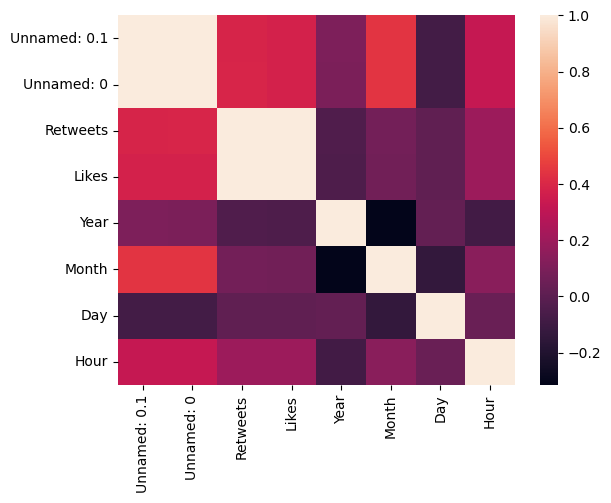

In [16]:
sns.heatmap(df.corr())

## Data Cleaning And Splitting for Training,Validation & Testing

In [21]:
# Convert text to lowercase
df['Text'] = df['Text'].apply(lambda x: x.lower())

# Remove punctuation
# The string.punctuation contains all the punctuation marks
# We use a regular expression to remove all punctuation marks from the text
df['Text'] = df['Text'].str.replace('[{}]'.format(string.punctuation), '')

# Remove stopwords
#  are common words like 'the', 'is', 'and', etc. that do not contribute much to the meaning of the text
# NLTK provides a list of stopwords for various languages, including English
# We tokenize each text into words and remove any word that is in the list of stopwords
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stopwords.words('english')]))

In [18]:
# Define sizes for training, validation, and test sets
train_size = int(0.8 * len(df))  # 80% of the data for training
val_size = int(0.1 * len(df))    # 10% of the data for validation
test_size = len(df) - train_size - val_size  # Remaining 10% for testing

# Split the data into training, validation, and test sets
train_data = df[:train_size]
val_data = df[train_size:train_size + val_size]
test_data = df[train_size + val_size:]

# Save the preprocessed data into separate CSV files
train_data.to_csv('train_data_preprocessed.csv', index=False)
val_data.to_csv('val_data_preprocessed.csv', index=False)
test_data.to_csv('test_data_preprocessed.csv', index=False)

## Data Visualization

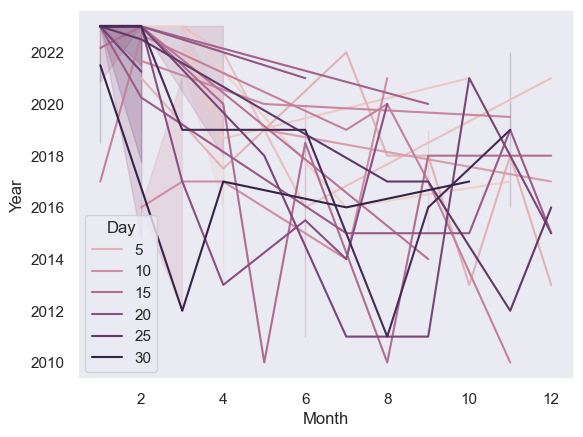

In [65]:
data = pd.read_csv(r"C:\Users\Ycomputer\Downloads\Semester 02 - CA01 MSc Data Analytics\sentimentdataset.csv")
info = data.iloc[1:200,]
sns.lineplot(x = "Month", y = "Year",data=info,hue="Day")
sns.set(style='dark',)
plt.show()

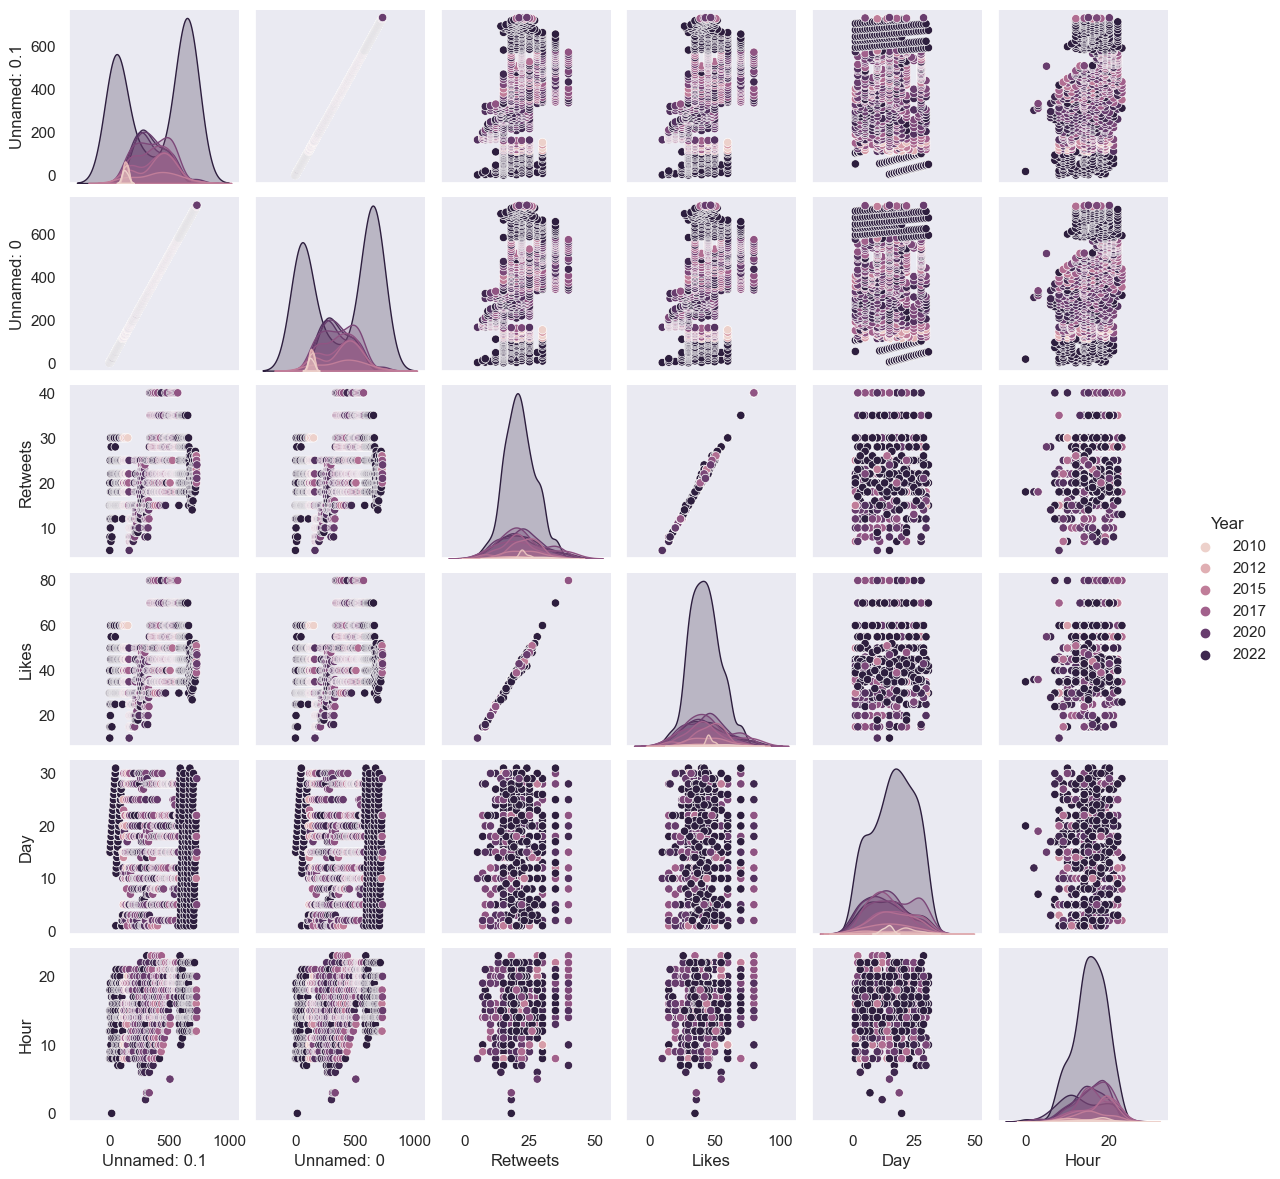

In [61]:
sns.pairplot(df.drop("Month", axis=1), hue="Year", size=2)

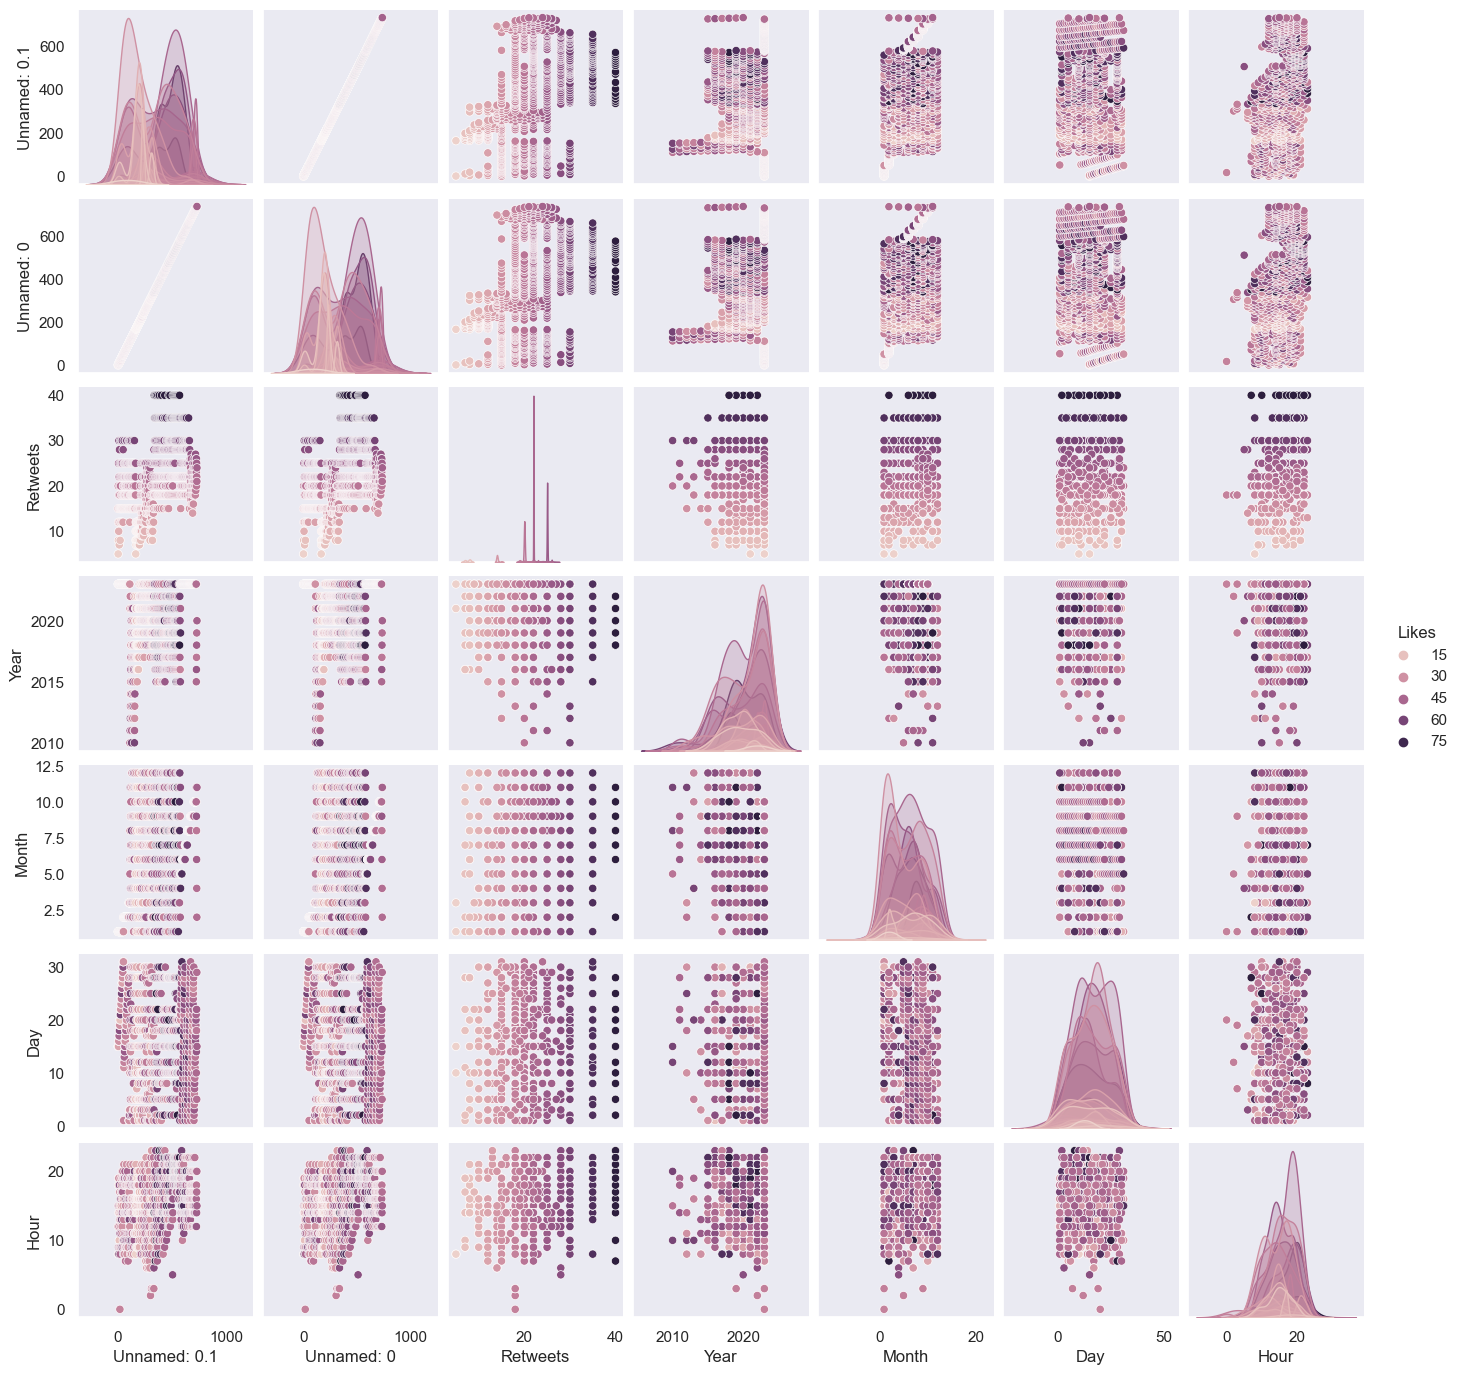

In [60]:
sns.pairplot(df.drop("Country", axis=1), hue="Likes", size=2)

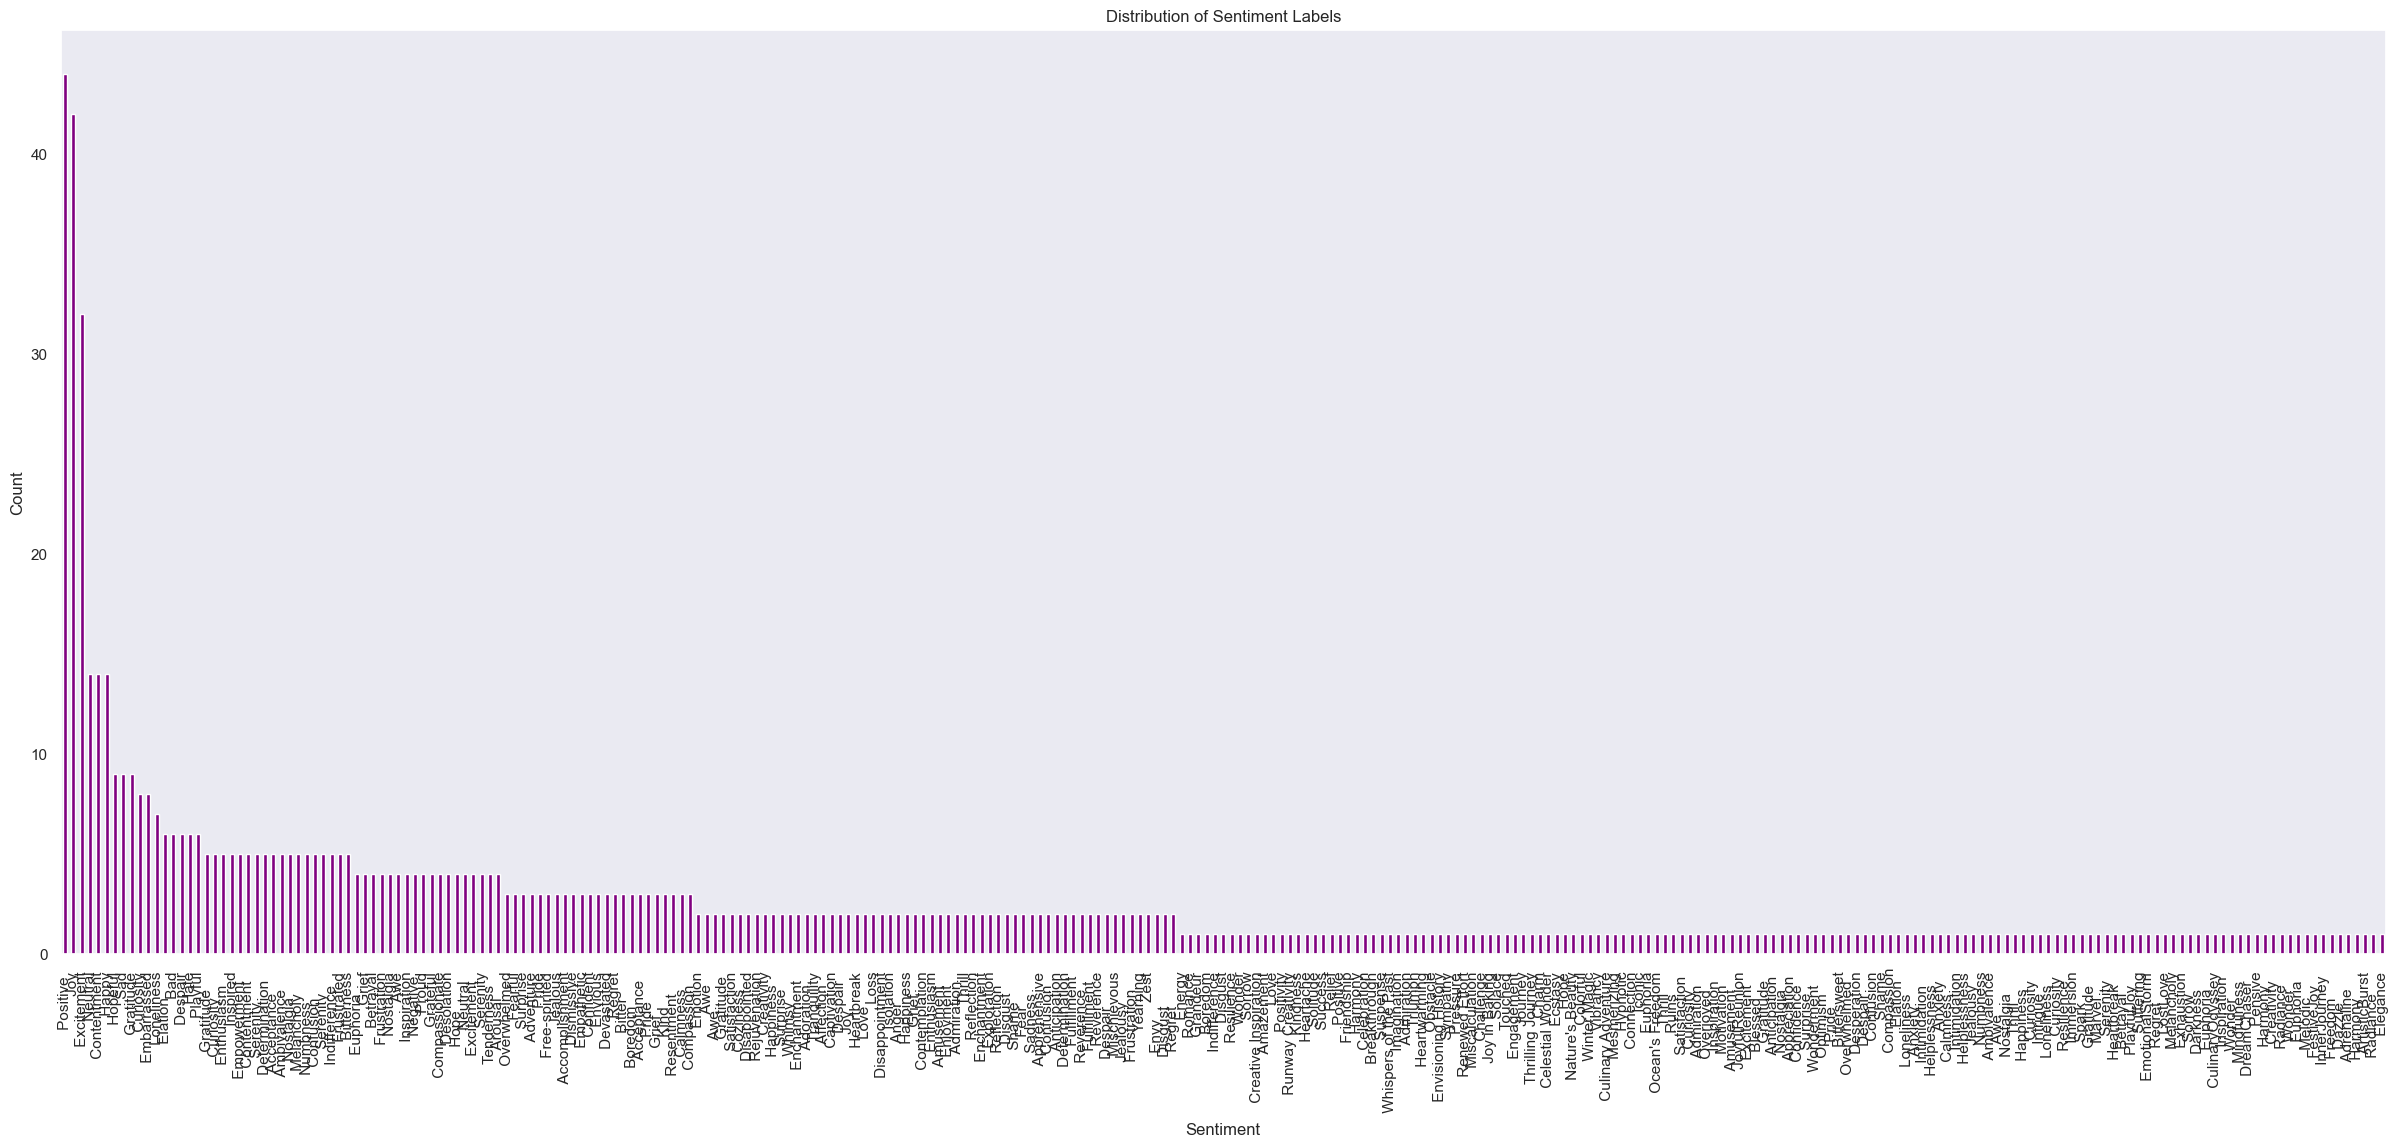

In [97]:
# Count the occurrences of each sentiment label
sentiment_counts = df['Sentiment'].value_counts()

# Plot the distribution of sentiment labels
plt.figure(figsize=(30, 12))
sentiment_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### Next step is feature extraction form selected dataset.

In [99]:
# Load dataset
df = pd.read_csv(r"C:\Users\Ycomputer\Downloads\Semester 02 - CA01 MSc Data Analytics\sentimentdataset.csv")

# Text feature extraction
text_data = df['Text']  # Assuming 'Text' is the column containing our text data

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_features = tfidf_vectorizer.fit_transform(text_data)

# Convert sparse matrix to DataFrame (optional)
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display TF-IDF features
print(tfidf_df.head())

   ablaze     about  abstract  abyss  academic  acceptance  accepts  \
0     0.0  0.000000       0.0    0.0       0.0         0.0      0.0   
1     0.0  0.000000       0.0    0.0       0.0         0.0      0.0   
2     0.0  0.000000       0.0    0.0       0.0         0.0      0.0   
3     0.0  0.371887       0.0    0.0       0.0         0.0      0.0   
4     0.0  0.000000       0.0    0.0       0.0         0.0      0.0   

   accidentally  accomplished  accomplishing  ...  yearning  years  yet  york  \
0           0.0           0.0            0.0  ...       0.0    0.0  0.0   0.0   
1           0.0           0.0            0.0  ...       0.0    0.0  0.0   0.0   
2           0.0           0.0            0.0  ...       0.0    0.0  0.0   0.0   
3           0.0           0.0            0.0  ...       0.0    0.0  0.0   0.0   
4           0.0           0.0            0.0  ...       0.0    0.0  0.0   0.0   

   you  young  zen  zero  zest  zestful  
0  0.0    0.0  0.0   0.0   0.0      0.0  
1 

#### In the next step, we trained model according to selected deep learning model which is CNN. This step gives us trained model which we use to perform the sentimental analysis in next step.

In [100]:
# Step 1: Prepare data
texts = [
    "got dressed day, remembered it's saturday. oops. #weekendvibes #teenstruggles",
    "survived group project without drama. miracles happen. #groupprojectsuccess #teenachievements",
    "entered kitchen with intention to cook. left bag of chips. cooking is overrated, anyway. #masterchefintraining #teenhumor"
]
sentiments = ["Indifference", "Satisfaction", "Disgust"]

# Step 2: Encode labels
label_encoder = LabelEncoder()
encoded_sentiments = label_encoder.fit_transform(sentiments)

# Step 3: Tokenize and vectorize text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts).toarray()

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, encoded_sentiments, test_size=0.2, random_state=42)

# Step 5: Define CNN model
model = Sequential()
model.add(Embedding(input_dim=len(vectorizer.vocabulary_), output_dim=100, input_length=X.shape[1]))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 1.0431 - accuracy: 1.0000 - val_loss: 1.1899 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 50ms/step - loss: 1.0490 - accuracy: 1.0000 - val_loss: 1.2426 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 49ms/step - loss: 1.0288 - accuracy: 0.5000 - val_loss: 1.2938 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 50ms/step - loss: 0.9733 - accuracy: 1.0000 - val_loss: 1.3477 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 34ms/step - loss: 0.9746 - accuracy: 1.0000 - val_loss: 1.3918 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 42ms/step - loss: 0.9715 - accuracy: 0.0000e+00 - val_loss: 1.4291 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 58ms/step - loss: 1.0141 - accuracy: 0.0000e+00 - val_loss: 1.4679 - val_accuracy: 0.00

#### The following step is the sentimental analysis. We utilize the trained model to perform sentimental analysis using trained model with CNN.

In [107]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')